In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from classification import NaiveBayes, ID3
import pandas as pd
naive_classy = NaiveBayes()
id3_classy = ID3()

# Introduction Classification

---
In the previous assignment, we developed a classifier using logistic regression, which is rooted in the principles of regression analysis. Classification models, however, can also be based on other fundamental principles such as probability calculations (probabilistic models) and entropy (tree models). In this assignment, we will delve into these two principles. A thorough understanding of entropy and probability is crucial for mastering more advanced algorithms. Specifically, we will explore the fundamentals of the Naive Bayes and ID3 algorithms. This exploration will provide a solid foundation for more complex topics in machine learning and data science.

This notebook consists the following parts:

- [A: Data preparation](#01)
- [B: Implementation of Naive bayes](#02)
- [C: BONUS: Implementation of Bernouilli](#03)
- [D: Evaluate your own implementation with library model](#04)
- [E: Implementation of ID3 algorithm](#05)
- [F: Compare library decision tree with ID3 algorithm](#06)
- [G: BONUS: split on treshold](#07)
- [H: BONUS: implement KNN](#07)

---

### Learning Objectives
By the end of this two-week period, you will be able to:
- Understand the fundamental concepts of probabilistic and entropy-based classification models.
- Grasp the construction and significance of probability calculations in Naive Bayes and entropy measures in ID3.
- Understand classification performance metrics and their impact on the models.
- Translate theoretical concepts of Naive Bayes and ID3 into functional code.
- Articulate the appropriate use cases for Naive Bayes and ID3 classification algorithms.
- Build your own Naive Bayes and ID3 classification models from scratch, implementing methods for fitting the model and making predictions.

---

### Instructions
- Read this notebook first
  - Ensure you fully understand the requirements and objectives of the assignment.
  - If you need additional context or clarification, please check the provided videos or background literature.

- Work through each part of the assignment methodically, ensuring all tasks are completed. 
  - Comment on code sections to explain the logic and choices made during implementation. 
  - Record experiments, parameter settings, and results to support reproducibility and future improvements.
  - Use metrics like accuracy, precision, recall, F1-score, ROC and confusion matrix to assess model performance
  - Use techniques like train-test split or cross-validation to evaluate the model
  - Improve model performance by transforming or engineering features to better fit the assumptions of the model  
  - Analyze the impact of different feature selections and transformations

- Using the code from the tasks A to E, create **python files** with classes that model data using NB and ID3. This class should include the following methods:
  - `fit()`: A method to fit the model to the training data, determining the algorithm.
  - `predict()`: A method to predict the outcome for new input data using the trained model.

- Submit a repository with a directory `classification` that includes:
  - This finished notebook and supportive code snippets
  - The code solutions (python files) that contain the classifier code. Consider to use an abstract base class that is extended by specific classifiers. Deliver code solutions for:  
    - The Gaussian Naive Bayes classifier
    - The Bernouilli Naive Bayes classsifier (optional)
    - The ID3 classifier
  - An evaluation document that details specific scenarios or datasets where each developed type is appropriate or inappropriate.


### Additional Notes:
- Do not add datafiles to your repository. Repositories with datafiles will not be accepted
- Class solutions should be delivered in python files. Not in notebooks
- When AI tools are used, you must provide proper references and explanations for how they were utilized. Failure to do so will be considered as academic fraud
- The bonus assignments (C, G, H) are not mandatory
- Use PEP8 

Good luck!

F.Feenstra




---
# Naive Bayes

---
<a name='01'></a>
## Part A. Data preparation 

### Use case Gaussian Naive Bayes 
The Gaussian Naive Bayes algorithm can be effectively demonstrated using the well-known Iris dataset. This dataset can be downloaded and prepared using the following code:

```{python}
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #reserve 30% of the data for testing
```

---

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #reserve 30% of the data for testing

In [3]:
try: 
    # your code here to load the iris dataset and prepare X_train, X_test, y_train, y_test
    # begin solution
    # end solution
    print(X.shape, y.shape)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
except: 
    print('load the data properly')
finally:
    print('Expected shape X, y:\n (150, 4) (150,)')
    print('Expected shape X_train, X_test, y_train, y_test:\n (105, 4) (45, 4) (105,) (45,)')


(150, 4) (150,)
(105, 4) (45, 4) (105,) (45,)
Expected shape X, y:
 (150, 4) (150,)
Expected shape X_train, X_test, y_train, y_test:
 (105, 4) (45, 4) (105,) (45,)


---
<a name='02'></a>
## Part B. Implementation of Naive bayes 


**Naive Bayes** is a probabilistic classifier based on Bayes' Theorem. It assumes independence among features given the class label, which simplifies the computation of probabilities.

**Bayes' Theorem** states:
$ P(C \mid X) = \frac{P(X \mid C) \times P(C)}{P(X)} $

Where:
- $P(C \mid X)$ is the posterior probability of class $C$ given feature vector $X$.
- $P(X \mid C)$ is the likelihood of feature vector $X$ given class $C$.
- $P(C)$ is the prior probability of class $C$.
- $P(X)$ is the evidence

There are three main types of Naive Bayes models. 
- Gaussian Naive Bayes: Assumes features follow a normal distribution (used for continuous data).
- Multinomial Naive Bayes: Asumes discrete features.
- Bernoulli Naive Bayes: Assumes binary/boolean features.

See also https://en.wikipedia.org/wiki/Naive_Bayes_classifier


### Steps to Implement Naive Bayes

#### Step 1: Calculate Probabilities
- **Prior Probability $P(C)$**: The proportion of each class in the training set.
  
 $$P(C) = \frac{\text{Number of instances of class } C}{\text{Total number of instances}}$$

#### Step 2: Calculate Likelyhood

- **Likelihood $P(X \mid C)$**: 
  - For **Gaussian Naive Bayes**: Calculate mean ($\mu$) and standard deviation ($\sigma$) for each feature per class and use those for 
    
    $$P(x_i \mid C) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right)$$

  - For **Multinomial/Bernoulli Naive Bayes**: Count occurrences or presence/absence of features per class and apply Laplace smoothing.
    See also https://video.hanze.nl/media/naive+bayes/0_j8w7lydm

#### Step 3: Apply Bayes' Theorem
- For each class, compute the posterior probability:
  
  $$P(C \mid X) \propto P(X \mid C) \times P(C)$$

- Choose the class with the highest posterior probability.


  


### <span style="background-color: lightyellow;">Implementation Task</span>
- complete the functions `get_labels()`, `get_priors()` and `classify()`for the gaussian naive bayes model and use the test code to check the outcomes.
- BONUS: create another classify function or classifier class that uses the Bernoulli implementation with laplace correction. Select an appropiate dataset to test the model.


In [8]:
def get_labels(y_train):
    """ Extract unique class labels from the training data """
    priors = naive_classy.get_priors(y_train)
    print(priors)
    return list(priors[0])


def get_priors(labels):
    """ Calculate prior probabilities for each unique label """
    ## For each unique label in labels:
    ##     Count the number of occurrences of the current label in labels
    ##     Divide the count by the total number of labels to get the prior probability
    ##     Append the prior probability to the priors list
    ##     Return the list of priors
    ## YOUR SOLUTION HERE
    prior_dict = naive_classy.get_priors(y_train)
    return list(prior_dict.values())

try:
    labels = get_labels(y_train)
    print(labels)
    print(get_priors(labels))
except Exception as error:
    print(f'implement functions error free: {error}')
finally:
    print('output should be three labels [0, 1, 2] each a prior of 33%')

print(X_train)

(array([0, 1, 2]), array([0.2952381 , 0.35238095, 0.35238095]))
[np.int64(0), np.int64(1), np.int64(2)]
implement functions error free: 'tuple' object has no attribute 'values'
output should be three labels [0, 1, 2] each a prior of 33%
[[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 2.4 3.8 1.1]
 [6.7 3.  5.  1.7]
 [4

In [9]:
def get_likelihoods(X_train, y_train):
    """ calculate mean and stdev matrices size (n_labels, n_features)"""
    mu, sd = naive_classy.get_likelihoods(X_train, y_train)
    return mu, sd

try: 
    mu, sd = get_likelihoods(X_train, y_train)
    print('non scaled outcome with 30% split\n')
    print(f'n_classes = {len(get_labels(y_train))}, n_features = {X_train.shape[1]}\n')
    print(f'means matrix (n_classes (labels) x n_features)\n{mu}')
    print(f'\nstdevs matrix (n_classes (labels) x n_features)\n{sd}')
except Exception as error:
    print(f'something goes wrong, finish implementation. {error}')
finally:
    output = f"""
    means matrix (n_classes (labels) x n_features)
    [[4.96451613 3.37741935 1.46451613 0.2483871 ]
     [5.86216216 2.72432432 4.21081081 1.3027027 ]
     [6.55945946 2.98648649 5.54594595 2.00540541]]

    stdevs matrix (n_classes (labels) x n_features)
    [[0.33461426 0.36957663 0.18236508 0.10737624]
     [0.52471426 0.29537462 0.48922652 0|.20333236]
     [0.64993116 0.31032865 0.53705634 0.29311555]]
    """
    print(f'\nExpected outcome: \n{output}')



non scaled outcome with 30% split

(array([0, 1, 2]), array([0.2952381 , 0.35238095, 0.35238095]))
n_classes = 3, n_features = 4

means matrix (n_classes (labels) x n_features)
[[4.96451613 3.37741935 1.46451613 0.2483871 ]
 [5.86216216 2.72432432 4.21081081 1.3027027 ]
 [6.55945946 2.98648649 5.54594595 2.00540541]]

stdevs matrix (n_classes (labels) x n_features)
[[0.33461426 0.36957663 0.18236508 0.10737624]
 [0.52471426 0.29537462 0.48922652 0.20333236]
 [0.64993116 0.31032865 0.53705634 0.29311555]]

Expected outcome: 

    means matrix (n_classes (labels) x n_features)
    [[4.96451613 3.37741935 1.46451613 0.2483871 ]
     [5.86216216 2.72432432 4.21081081 1.3027027 ]
     [6.55945946 2.98648649 5.54594595 2.00540541]]

    stdevs matrix (n_classes (labels) x n_features)
    [[0.33461426 0.36957663 0.18236508 0.10737624]
     [0.52471426 0.29537462 0.48922652 0|.20333236]
     [0.64993116 0.31032865 0.53705634 0.29311555]]
    


In [10]:
def classify(X_test, labels, priors, mu, sd):
    """
    Classify each test sample

    Args:
        - X_test: Test data samples, a matrix of dimensions (m, n)
        - labels: List of unique class labels
        - priors: List of prior probabilities for each class
        - mu: Matrix of class-wise means for each feature
        - sd: Matrix of class-wise standard deviations for each feature

    Returns:
        - y_pred: List of predicted class labels for each test sample
    """
    
    #  For each sample i
    #      For each class j:
    #           Calculate squared differences: (X_test[i,:] - mu[j,:])^2
    #           Calculate norm_factors:  1 / sqrt(2 * pi * sd[j,:]
    #           Calculate likelihoods: norm_factors * exp(-squared_difference / (2 * sd[j,:])^2))
    #           Append the likelihoods product multiplied by priors for class j to posteriors list
    #      Get the highest posterior and use that as prediction for that sample
    #  (See also the formula)
   
    
    ## YOUR SOLUTION HERE
    y_pred = naive_classy.classify(X_test, labels, priors, mu, sd)
    return y_pred

try:
    labels, priors = naive_classy.get_priors(y_train)
    mu, su = get_likelihoods(X_train, y_train)
    y_pred = classify(X_test, labels, priors, mu, su)

    print(y_test[0:10])
    print(y_pred[0:10])
except Exception as error:
    print(f'something goes wrong, finish implementation. {error}')
finally:
    print('both y_test labels and and y_pred labels should be similar')


[1 0 2 1 1 0 1 2 1 1]
[1. 0. 2. 1. 1. 0. 1. 2. 1. 1.]
both y_test labels and and y_pred labels should be similar


---
<a name='03'></a>
## Part C. Evaluate your own implementation with Library model
There are several libraries available for machine learning models, such as Scikit-learn, TensorFlow, Keras and PyTorch. Scikit-learn is useful for simple models such as Naive Bayes. Read more about Gaussian Naive Bayes [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

### Evaluate with accuracy
The cell code below prints the accuracy of your developed model. Compare the accuracy of your model with the accuracy of the Gaussian Naive Bayes model from sklearn. You can extend the evaluation with other metrcis. See also https://video.hanze.nl/media/model-evaluation/0_gybpnhq7. Mind you that week 5 and 6 will cover more evaluation techniques







In [11]:
def evaluateNB(y_test, y_pred):
    match = 0
    for i in np.arange(0,len(y_test)):
        if y_test[i] == y_pred[i]:
            match = match + 1
    acc = match / len(y_test)
    return acc

evaluateNB(y_test=y_test, y_pred=y_pred)

## YOUR CODE HERE TO compare your model with the model from a library like sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# --- Your model ---
my_acc = evaluateNB(y_test, y_pred)
print(f"Mine: {my_acc:.4f}")

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_sklearn = gnb.predict(X_test)

sklearn_acc = accuracy_score(y_test, y_pred_sklearn)
print(f"Sklearn GaussianNB: {sklearn_acc:.4f}")



Mine: 0.9778
Sklearn GaussianNB: 0.9778


### Bonus: Evaluate with decision boundary

A decision boundary is a region in the feature space where the model's predicted classification changes from one class to another. It is the threshold at which the model is equally uncertain about which class a data point belongs to. The goal is to find a decision boundary that not only separates the training data well but also generalizes to unseen data. A decision boundary that is too complex might capture noise in the data (overfitting), while a too-simple boundary might miss important patterns (underfitting). Class imbalance can skew the decision boundary, making it biased towards the majority class. 

To plot the decision boundary, first create a class that includes `fit()` and `predict()` methods. Ensure that the appropriate code snippets are included in the `fit()` method to train the model and in the `predict()` method to make predictions. Modify your code snippets as needed to ensure they are compatible with the class implementation. 



In [ ]:
# # Custom Gaussian NB classifier example (replace this with your actual classifier)

# class CustomGaussianNB:
#     def __init__(self):
#         pass
#     def fit(X, y):
#         pass
#     def predict(X, y):
#         pass


# #### TEST CODE TO VISUALIZE THE DECISION BOUNDARY


# # Fit the classifier on all features
# classifier = CustomGaussianNB()
# classifier.fit(X_train, y_train)
# plotter.decision_boundery(classifier, X_train, y_train, X_test, y_test)
    

---
# ID3
---
### Use case ID3
For the ID3 algorithm evaluation we will use the [METABRIC](https://www.cbioportal.org/study/summary?id=brca_metabric) dataset from [cBioportal](https://www.cbioportal.org/). This breast cancer dataset contains clinical features. The aim is to predict survival class (vital status). For the development of the algorithm we prepared a small dataset derived from the METABRIC dataset. The dataset is called `sample.txt` and can be downloaded 
[here](https://bioinf.nl/~fennaf/DSLS/ML/sample.txt)

Once the algorithm is validated you can use the full METABRIC dataset from bioportal.


--- 
<a name='04'></a>
## Part D. Implementation of ID3 algorithm

The ID3 algorithm (Iterative Dichotomiser 3) is an algorithm used for constructing decision trees, which are commonly used in machine learning for classification tasks. A decision tree can be visualized as a flowchart-like structure where each internal node represents a test on a feature, each branch represents the outcome of the test, and each leaf node represents a class label. The ID3 algorithm is basis to more advanced decision tree algorithms such as C45. The algorithm selects the features that best separates the data based on a measure called **information gain**. Information gain is calculated using the concept of **entropy** from information theory. Entropy measures the impurity or uncertainty in a dataset, Information Gain measures the reduction in entropy after splitting a dataset based on an feature (attribute). The higher the Information Gain, the more informative the feature is for classification.

### Entropy

$$\text{Entropy} = -\sum_{i=1}^{n} p_i \cdot \log(p_i)$$

where:

- $p_i$ represents the individual probabilities in the distribution.
- The summation is taken over all probabilities $p_i$ where $p_i > 0$ ($p_i > 0$ avoids undefined operations for $\log(0)$)

The choice of base for $log$ varies for different applications. Base 2 gives the unit of bits (or "shannons"), while base e gives "natural units" nat, and base 10 gives units of "dits", "bans", or "hartleys". 
https://en.wikipedia.org/wiki/Entropy_(information_theory)


### Information Gain in Decision Trees

In the context of decision trees, Information Gain is used to determine the best feature to split the data at each node. The feature with the highest Information Gain is selected for the split.

1. **Calculate the entropy of the entire dataset**:
   $$\text{Entropy}(D) = -\sum_{i=1}^{n} p_i \cdot \log(p_i)$$
   where $p_i$ is the probability of class $i$ in the entire dataset $D$.

2. **For each attribute $A$**:
   - Calculate the entropy for each subset $D_v$ (where $v$ is a possible value of $A$):
     $$\text{Entropy}(D_v) = -\sum_{i=1}^{n} p_{iv} \cdot \log(p_{iv})$$
     where $p_{iv}$ is the probability of class $i$ in subset $D_v$.
   - Calculate the weighted sum of the entropies of all subsets:
     $$\sum_{v \in \text{Values}(A)} \frac{|D_v|}{|D|} \cdot \text{Entropy}(D_v)$$
     where $|D_v|$: The number of elements in subset $D_v$ and $|D|$: The total number of elements in dataset $D$
     

3. **Calculate the Information Gain for attribute \( A \)**:
   $$\text{IG}(A) = \text{Entropy}(D) - \sum_{v \in \text{Values}(A)} \frac{|D_v|}{|D|} \cdot \text{Entropy}(D_v)$$
   where $\text{Values}(A)$: The set of all possible values that attribute $A$ can take


### ID3 algorithm

1. select best feature based on information gain
2. create a node for the selected feature
3. split the data into subsets based on the possible values of the selected feature
4. recursive apply algorithm on each subset, select next best feature until all samples in subset belong to a class or there are no more features
5. use manority voting for class if several class labels remain in a subset


NB: 
- to prevent overfitting you can set a max_depth, like pruning a tree.


Quinlan, J. R. 1986. Induction of Decision Trees. Mach. Learn. 1, 1 (Mar. 1986), 81–106

### <span style="background-color: lightyellow;">Implementation Task</span>
- Download the `sample.txt` dataset [here](https://bioinf.nl/~fennaf/DSLS/ML/sample.txt)
- Complete the `entropy()`, `information_gain()`, and `ID3()` functions. Feel free to add additional functions if necessary to enhance the implementation. 
- Consider to adjust the code with a `max_depth` property.
- Use the code snippets to create your own ID3 classifier. This we will use in part E and F.



#### Expected outcome 
The expected outcome using `sample.txt` (without splitting) for the initial gain calculations is as follows:

```{python}
	Entropy of the target (Vital Status): 0.97
	feature Histological Type gain 0.00
	feature Grade gain 0.02
	feature Tumor Stage gain 0.07
	feature ER Status gain 0.02
	best feature: Tumor Stage
```

The result of the ID3 algorithm is a nested dictionary with the best features and the targets like this
```
{'Tumor Stage': {'stage iii': {'Histological Type': {'ilc': 'alive', 'other': 'dead', 'idc': 'alive'}}, 'stage i': {'Histological Type': {'ilc': 'dead', 'mixed type': 'dead', 'other': 'alive', 'idc': 'alive'}}, 'stage iv': {'Histological Type': {'ilc': 'alive', 'idc': 'dead'}}, 'stage ii': {'Grade': {'grade 2': 'alive', 'grade 3': 'dead'}}}}
```
Which can be represented in a tree using the `plotter.print_tree(decision_tree)` function
```{python}
	Decision Tree:
	Tumor Stage
		stage iii -> 		
			Histological Type
				ilc -> 				alive
				other -> 			dead
				idc -> 				alive
		stage i -> 		
			Histological Type
				ilc -> 				dead
				mixed type -> 			dead
				other -> 			alive
				idc -> 				alive
		stage iv -> 		
			Histological Type
				ilc -> 				alive
				idc -> 				dead
		stage ii -> 		
			Grade
				grade 2 -> 			alive
				grade 3 -> 			dead

```
A more fancy plot can be created using the `plotter.create_plot(decision_tree)` function
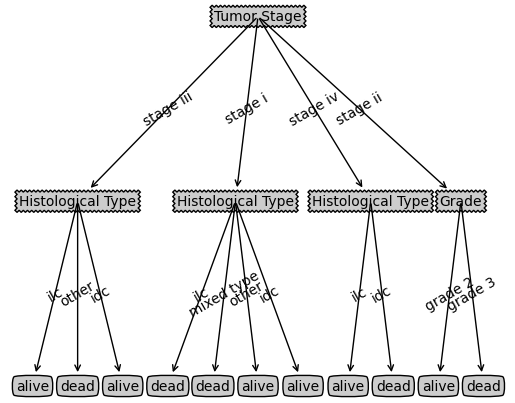

### Bonus
Use networkX to present the tree in a graph 

In [12]:
# YOUR CODE HERE TO IMPORT THE SAMPLE.TXT DATASET
from scipy.stats import entropy as entr
data = pd.read_csv("sample.txt", sep="\t")
# information_gain(data, data.columns[:-1], data.columns[-1])

In [15]:
# Define target and features explicitly
target = data.columns[-1]
features = data.columns[:-1]

# Calculate the entropy of the target variable (Class)
y = data[target]
print(f"Entropy of the target ({target}): {id3_classy.entropy(y)}")

# Build the decision tree using the ID3 algorithm
decision_tree = id3_classy.train_id3(data, features, target, max_depth=2)

# Print the resulting decision tree
print(f"Decision Tree: {decision_tree}")
# for key in decision_tree.keys():
#     print(key)
# print(decision_tree["Tumor Stage"]["Stage III"]["Tumor Stage"])
#plot results
# plotter.print_tree(decision_tree)
#plotter.create_plot(decision_tree)



Entropy of the target (Vital Status): 0.9709505944546686
Decision Tree: {'Tumor Stage': {'Stage III': {'Histological Type': {'ILC': 'Alive', 'Other': 'Dead', 'IDC': 'Alive'}}, 'Stage I': {'Histological Type': {'ILC': 'Dead', 'Mixed Type': 'Dead', 'Other': 'Alive', 'IDC': 'Alive'}}, 'Stage IV': {'Histological Type': {'ILC': 'Alive', 'IDC': 'Dead'}}, 'Stage II': {'Grade': {'Grade 2': 'Alive', 'Grade 3': 'Dead'}}}}


---
<a name='05'></a>
## Part E. compare decision tree sklearn with ID3 algorithm

In this part, you will compare the Decision Tree classifier from Scikit-Learn with the ID3 algorithm. The goal is to understand the differences in implementation, performance, and application of these two algorithms. 

### <span style="background-color: lightyellow;">Evaluation Task</span>
- Add code to use the ID3 algorithm to predict the class based on its feature values
- Use the METABRIC dataset from [cBioportal](https://www.cbioportal.org/) for evaluation. The data needs some preparation before it can be used by your ID3 algorithm or the sklearn classifier. Make sure that you select meaningful features.
- Split the data into a train and a test set
- Present your implementation steps to use the ID3 algorithm and the decisiontree classifier from sklearn
- Show and compare evaluation metrics for both classifiers
- Discuss the potential reasons for any observed differences in performance


See also https://video.hanze.nl/media/DecisionTree/0_p5h62et5

In [19]:
## Data Preparation:
# The data should be preprocessed before use. For the custom classifier, categorical data is required, so continuous variables need to be binned.
# For sklearn models, categorical data must be converted into numerical values, either through custom encoding, label encoding, or one-hot encoding.
# Columns like IDs and cohort should be dropped, as they are not useful for the model.

# YOUR CODE HERE TO PREPARE THE DATA, for instance
# data['Vital Status'] = data['Overall Survival Status'].map({'0:LIVING':'alive', '1:DECEASED':'died'})


# The following features could be selected, but you are free to select more or other features
features = ['Cellularity', 'Chemotherapy', 'ER Status', 'HER2 Status',
       'Hormone Therapy', 'Tumor Stage', 'Radio Therapy', 'Oncotree Code']
target = 'Vital Status'

# X = data[features]
# y = data[target]

#################################


In [ ]:
def evaluate(clf, X_test, y_test):
    # Predict on the test data
    y_pred = clf.predict(X_test)
    # Evaluate the model performance
    print(f"Actual labels:{y_test.to_list()[0:10]}")
    print(f"Predicted labels:{y_pred[0:10]}")
    print(f"Accuracy:{accuracy_score(y_test, y_pred):.2f}")


# Split the data into training and testing sets (80% train, 20% test)
# for id3 as well as sklearn decision tree (use sklearn Decision Tree classifier with entropy criterion)
# fit the model
# print tree from fitted model
# evaluate model


In [30]:
data = pd.DataFrame({
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast",
                "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temperature": [85, 80, 83, 70, 68, 65, 64, 72, 69, 75, 75, 72, 81, 71],
    "Humidity": [85, 90, 86, 96, 80, 70, 65, 95, 70, 80, 70, 91, 75, 91],
    "Windy": [False, True, False, False, False, True, True,
              False, False, False, True, True, False, True],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes",
             "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
})

target = "Play"
features = [col for col in data.columns if col != target]
tree = id3_classy.train_id3(data, features, target)
with_preds_df = id3_classy.predict_df(data, tree)
id3_classy.example_df_predict()

     Outlook  Temperature  Humidity  Windy Play pred
9       Rain           75        80  False  Yes  Yes
11  Overcast           72        91   True  Yes   No
0      Sunny           85        85  False   No  Yes
12  Overcast           81        75  False  Yes  Yes
5       Rain           65        70   True   No  Yes
8      Sunny           69        70  False  Yes  Yes


 ---
 <a name='06'></a>
 ## Part F. Development of the classifier classes
 
When you are satisfied with your developed code snippets you can build a python file (No notebook!!!) with the classifier classes. Use your Object Oriented programming skills to compose the classes with at least the methods `fit()` and `predict()`.  The method `fit()` should fit the best algorithm and the method `predict()` should predict the class. 

### <span style="background-color: lightyellow;">Development Task</span>
- Submit a repository with a directory `classification` that includes:
  - This finished notebook and supportive code snippets
  - The code solutions (python files) that contain the classifier code. Consider to use an abstract base class that is extended by specific classifiers. Deliver code solutions for:  
    - The Gaussian Naive Bayes classifier
    - The Bernouilli Naive Bayes classsifier (optional)
    - The ID3 classifier
  - An evaluation document that details specific scenarios or datasets where each developed type is appropriate or inappropriate.


### Additional notes
- Code quality and readability are important, so adhere to best practices in coding and documentation.
- See also the additional notes in the beginning of this notebook


---
 <a name='07'></a>
## Part G. BONUS: Split on treshold
We used the ID3 algorithm to determine the best feature to split on. Modify the algorithm to split based on specific threshold values, similar to how the scikit-learn decision tree algorithm allows splitting on conditions like this.

## Part H. BONUS: implement KNN algorithm
In this bonus assignment, you will have the opportunity to delve deeper into the world of machine learning by implementing the K-Nearest Neighbors (KNN) algorithm from scratch. KNN is a simple yet powerful classification algorithm that makes predictions based on the majority class among the closest data points in the feature space. This hands-on exercise will enhance your understanding of how distance metrics, such as Euclidean distance, are used to measure similarity between data points, and how the choice of k (the number of neighbors) impacts the model's performance. Before you begin coding, familiarize yourself with the KNN algorithm to ensure you understand the key concepts and mechanics behind it. Once you have a solid understanding, your task will be to create a class that encapsulates the KNN algorithm, implementing methods for training (fitting the model) and making predictions. 


---
## References: 


The study of Taggart is a nice example of the usage of the ID3 algorithm. The ID3 algorithm classified and predicted branchpoint sites in pre-mRNA transcripts. The study identified key sequence motifs and positional features that are indicative of branchpoints. You can read about the study [here]https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3465671/. [2]


[1] Pereira et al. Nat Commun 2016, Rueda et al. Nature 2019, Curtis et al. Nature 2012<br></br>

[2] Taggart AJ, DeSimone AM, Shih JS, Filloux ME, Fairbrother WG. Large-scale mapping of branchpoints in human pre-mRNA transcripts in vivo. Nat Struct Mol Biol. 2012 Jun 17;19(7):719-21. doi: 10.1038/nsmb.2327. PMID: 22705790; PMCID: PMC3465671.

[3] Quinlan, J. R. 1986. Induction of Decision Trees. Mach. Learn. 1, 1 (Mar. 1986), 81–106